# Template for evaluating several ML classification models

This template is a collection of preprocessing steps with a subsequent comparative evaluation of several machine learning models. Not all preprocessing step need to be applied to a specific dataset. You must choose or try which are helpful steps and which do not contribute to a good and/or computational feasable result.

## Import basic Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import the dataset

In [2]:
dataset = pd.read_csv('Wine.csv', 
                      #header=None
                     )
#dataset = dataset.drop(columns=[dataset.columns[0]])
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Intuitive approach to the dataset

### Basics of the data

In [3]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
dataset.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


### Correlations between the parameters

1. Correlation Matrix

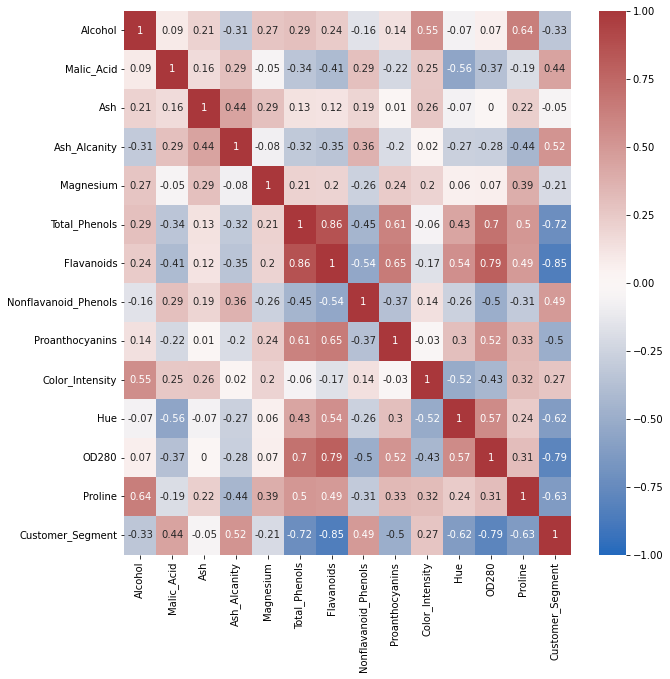

In [6]:
import seaborn as sns
matrix = dataset.corr().round(2)
plt.figure(figsize = (10,10))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

2. Pairwise plot of all numerical features

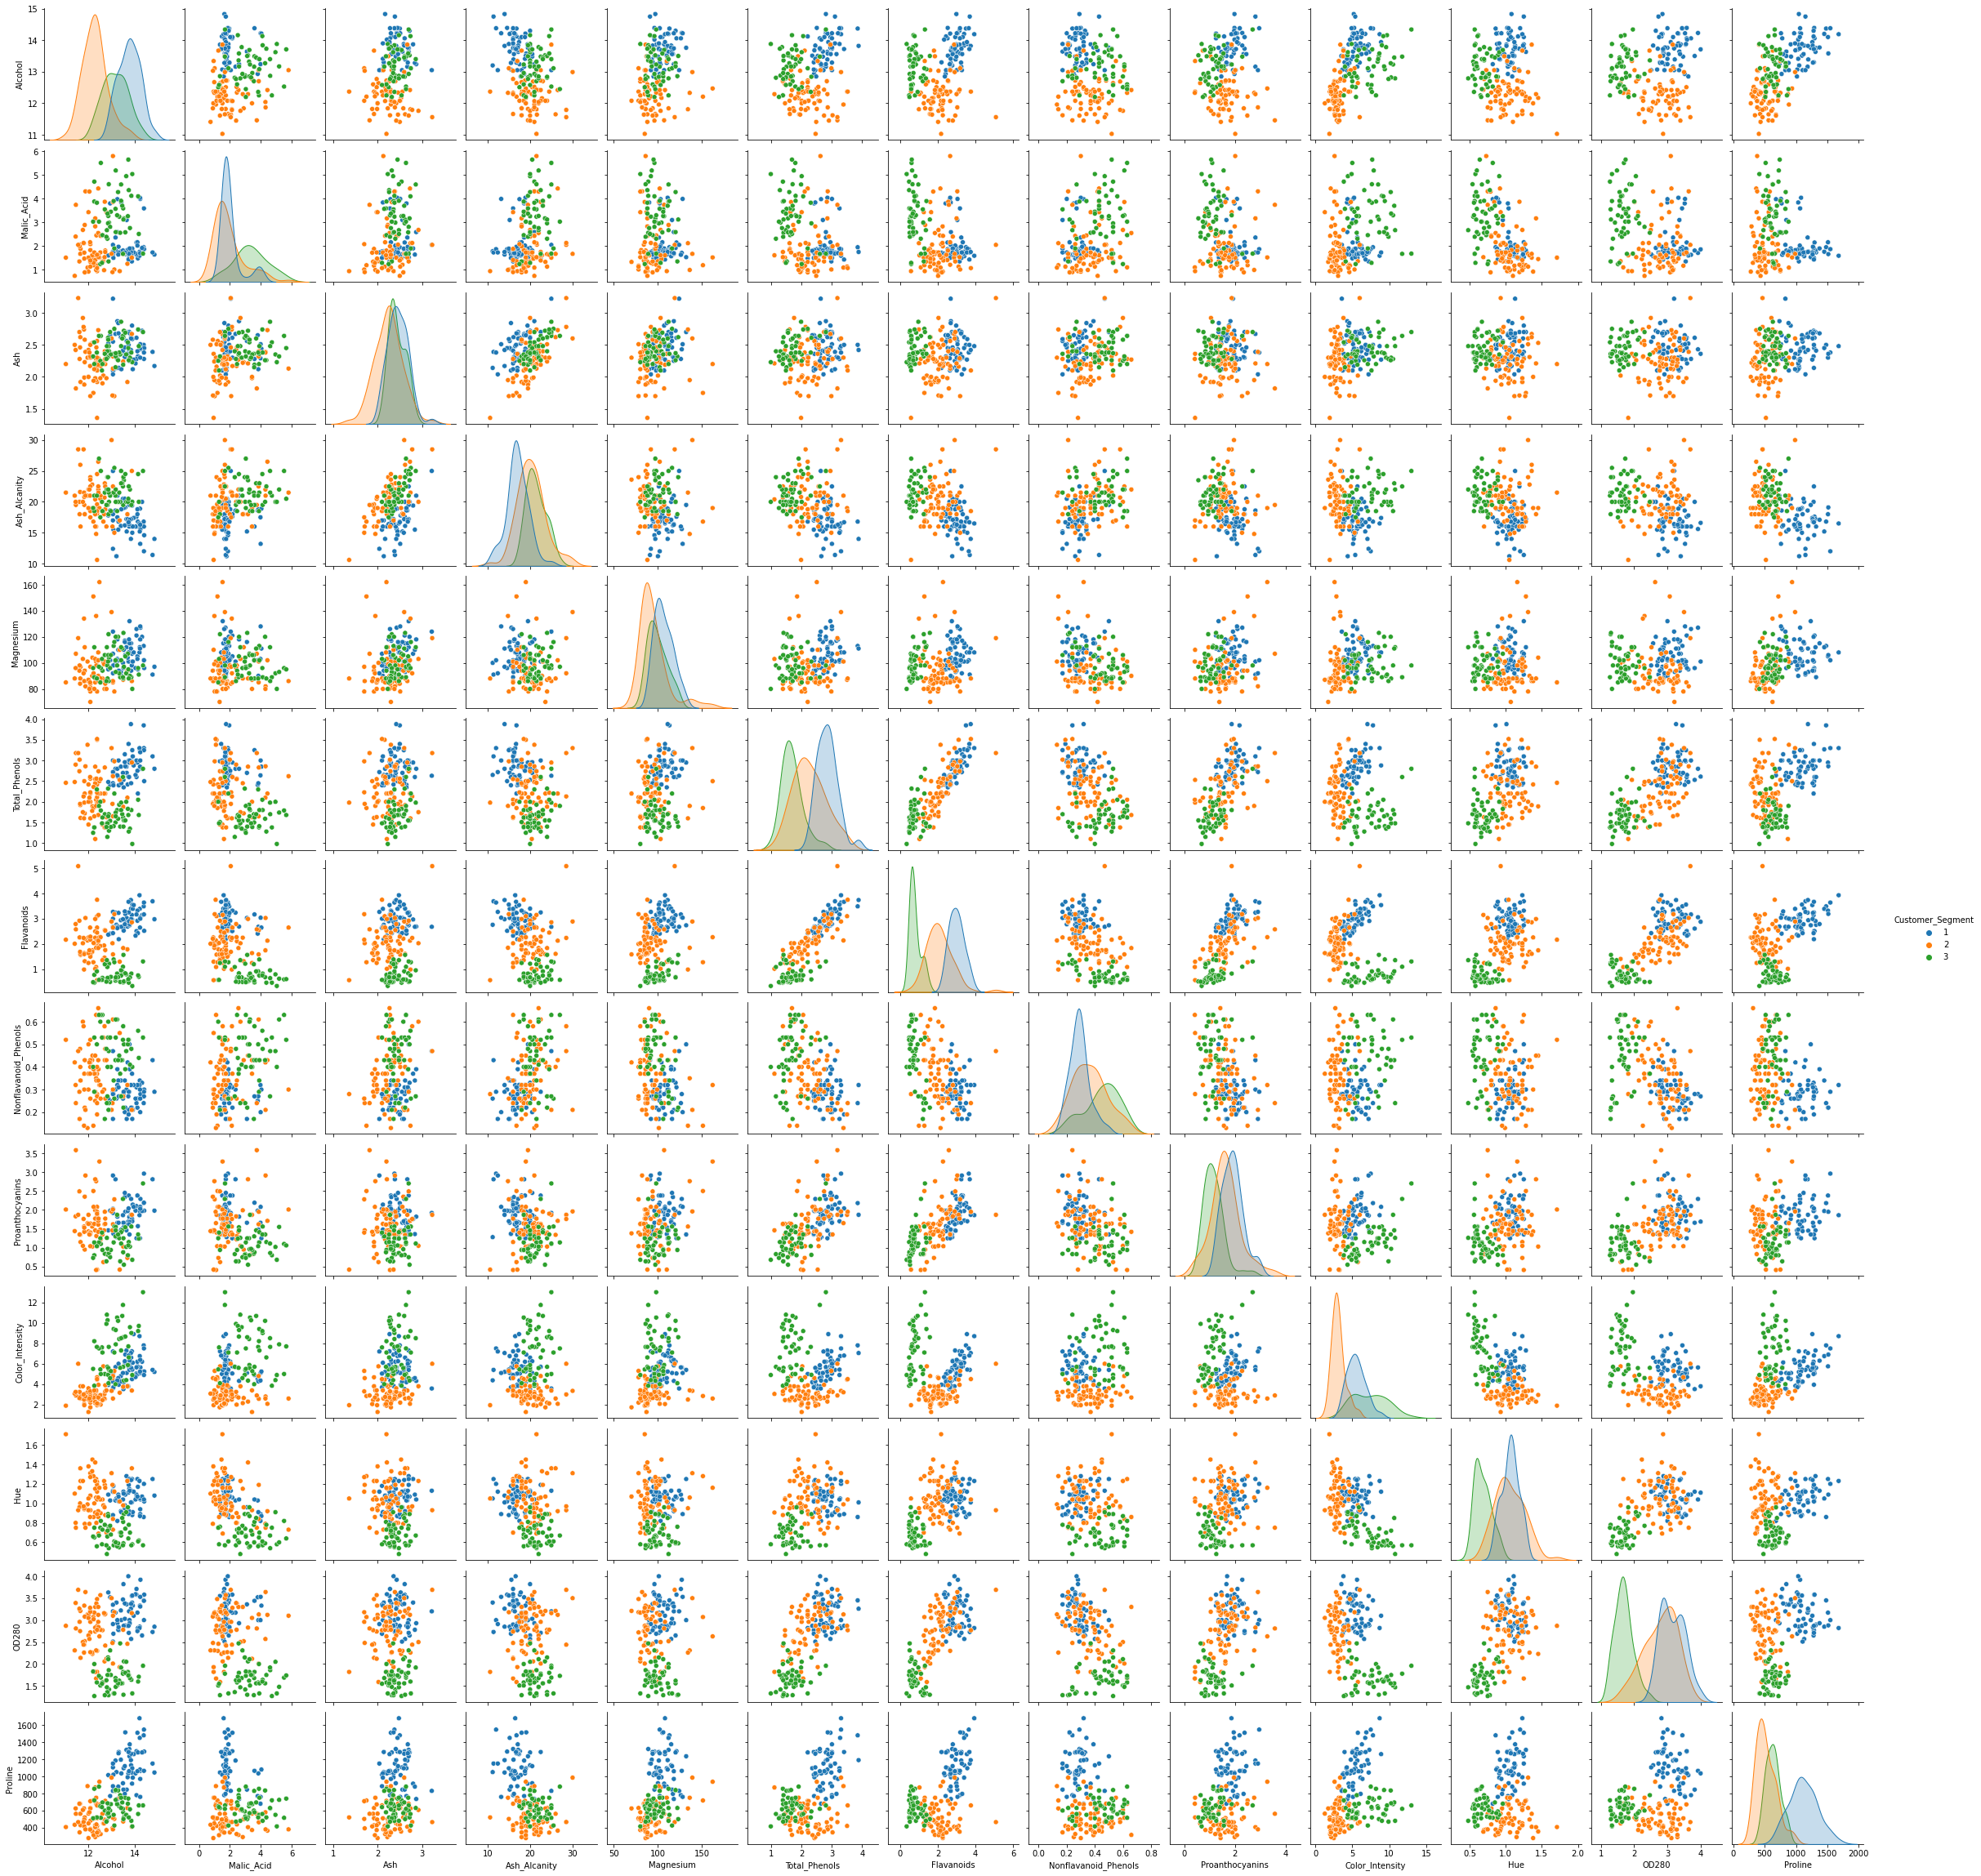

In [7]:
sns.pairplot(dataset, 
             hue='Customer_Segment',  # Can specify a categorial feature to highlight that in the plots.
             palette='tab10',
            )

## Data Preprocessing

### Impute missing data

In [8]:
print(f"Missing data points: {dataset.isnull().sum().sum()}")

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

Missing data points: 0


### Encoding categorical data

**Label encoding** is used for 
- (binary) target labels or 
- when the applied model is tree-like or
- when there is a linear relationship between the labels.

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


**One-Hot encoding** is used for more than one category and is generally preferred.

Different transformers can be applied to different columns. They are given as a list of tuples (name, transformer, columns), where *name* is a unique identifyer, *transformer* the kind of encoding, and *columns* a list of columns the encoder is applied to.

The result is that the categoric column, containing C categories, is replaced by C new columns, of which for each sample only one contains the value 1 and all others the value 0 (One-Hot vector).

The parameter *remainder='passthrough'* leaves the rest of the data untouched. Otherwise the other columns would be dropped. The parameter *drop='first'* is used to avoid the Dummy Parameter Trap.

One-hot encoding is best used in combination with PCA, especially if not one dummy dimension is dropped.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [])], remainder='passthrough', drop='first')
X = np.array(ct.fit_transform(X))

### Splitting the dataset into training and test data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Feature scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Principle Component Analysis (PCA)

PCA is used to reduce the dimentionality of the dataset. It minimizes the correlation between the features by performing a coordinate transformation onto the principle components (Eigenvectors). The user can then reduce the dataset to the principle components that contribute most to the variability of the data.

Following the PCA is performed with the maximum of target dimensions. The contribution of the dimensions to the variability of the dataset is then plotted in a Scree plot (histogram of the percetages of the contribution). From this it is easy to see how many dimension are needed to explain the dataset sufficiently (often 60 % is used).

In cases where the (absolute) variation of the features varies, feature scaling should be performed before the PCA.

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA()

[0.35684314 0.19825228 0.11659894 0.07517421 0.05979606 0.05018484
 0.04084839 0.02498555 0.02392099 0.01803756 0.01520102 0.01279138
 0.00736563]


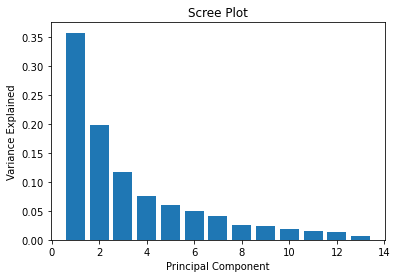

In [13]:
# Plotting the Scree plot
print(pca.explained_variance_ratio_)
PC_values = np.arange(pca.n_components_) + 1
plt.bar(PC_values, pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [14]:
# Get the number of principal components needed to have a sum of variances above a certain limit.
LIMIT = 0.6
sum_of_variance = 0
i = 0
while sum_of_variance < LIMIT:
    sum_of_variance += pca.explained_variance_ratio_[i]
    i += 1
number_of_principal_components = i
print(f"Sum of variances = {sum_of_variance:.4f} at {number_of_principal_components} principle components.")

Sum of variances = 0.6717 at 3 principle components.


In [15]:
# Run the PCA with the chosen number of principle components and reduce the dimensions accordingly.
pca = PCA(n_components = number_of_principal_components)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In cases the data is not linearly separatable, KernelPCA may help.

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = min(X_train.shape), kernel = 'rbf')
kpca.fit(X_train)

In [ ]:
# Plotting the Scree plot
PC_values = np.arange(kpca.n_features_in_) + 1
plt.bar(PC_values, kpca.eigenvalues_ / kpca.eigenvalues_.sum())
plt.title('Scree Plot Kernel')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
# Get the number of principal components needed to have a sum of variances above a certain limit.
LIMIT = 0.6
sum_of_variance = 0
i = 0
while sum_of_variance < LIMIT:
    sum_of_variance += kpca.eigenvalues_[i] / kpca.eigenvalues_.sum()
    i += 1
number_of_principal_components = i
print(f"Sum of variances = {sum_of_variance} at {number_of_principal_components} principle components.")

### Linear Discriminant Analysis (LDA)

LDA is both a classifier (supervised learning) and a technique to reduce the dimensionality. It spans a new coordinate system in which the class separation is maximized. Use n_components = None to use all components, or reduce it to the number of dimensions needed.

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
lda.fit(X_train, y_train)
X_train = lda.transform(X_train)
X_test = lda.transform(X_test)
print(f"Percentage of variance explained by each of the selected components: {lda.explained_variance_ratio_}")

Percentage of variance explained by each of the selected components: [0.68723957]


# Comparing the ML classifiers

## Import the classifier classes

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

/home/tillmann/anaconda3/envs/py310/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Model and parameter definitions

In [16]:
names = [
    "Logistic Regression",
    "K-nearest Neighbors",
    "SVM",
    #"Linear SVM",
    #"RBF SVM",
    "Naive Bayes",
    "Decision Tree",
    "Random Forest",
    "XGBoost"
]

classifiers = [
    LogisticRegression(random_state=0),
    KNeighborsClassifier(metric = 'minkowski', p = 2),
    SVC(random_state=0),
    #SVC(kernel = 'linear', random_state = 0),
    #SVC(kernel = 'rbf', random_state = 0),
    GaussianNB(),
    DecisionTreeClassifier(random_state = 0),
    RandomForestClassifier(random_state = 0),
    XGBClassifier(use_label_encoder=False)
]

parameters = [
    [  # Logistic Regression
        {'C': [0.25, 0.5, 0.75, 1, 10]}
    ],
    [  # K-nearest Neighbors
        {'n_neighbors': [2, 3, 4, 5, 10, 20, 100], 'weights': ['uniform', 'distance']}
    ],
    [  # Support Vector Machine
        #{},
        {'C': [0.25, 0.5, 0.75, 1, 10], 'kernel': ['linear']},
        #{'C': [0.25, 0.5, 0.75, 1, 10], 'kernel': ['poly'], 'degree': [2, 3, 4, 5]},
        {'C': [0.25, 0.5, 0.75, 1, 10], 'kernel': ['rbf'], 'gamma': [0.1, 0.3, 0.5, 0.7, 0.9]}         
    ],
    [  # Naive Bayes
        {}
    ],
    [  # Decision Tree
        #{},
        {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [2, 3, 4, 5, 8, 12, 20]}
    ],
    [  # Random Forest
        #{},
        {'n_estimators': [5, 10, 20], 'max_depth': [2, 3, 4, 5, 8, 12, 20], 'criterion': ['gini', 'entropy', 'log_loss']}
    ],
    [  # XGBoost
        #{},
        {'max_depth': [3, 5, 7], 'n_estimators': [10, 20, 100]}
    ]
]

## Model Comparison at standard settings

In [17]:
from time import perf_counter
print(f"Classifier             Accuracy      Time [s]\n")
for name, classifier in zip(names, classifiers):
    starttime = perf_counter()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(f"{name:20}   {accuracy_score(y_test, y_pred) * 100:5.2f}%        {perf_counter() - starttime:5.4f}")

Classifier             Accuracy      Time [s]

Logistic Regression    100.00%        0.0268
K-nearest Neighbors    97.22%        0.0061
SVM                    97.22%        0.0047
Naive Bayes            100.00%        0.0030
Decision Tree          91.67%        0.0029
Random Forest          97.22%        0.1843
[15:05:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost                97.22%        0.1019


## Hyperparameter tuning using Grid Search including k-fold Cross Validation

In [18]:
def get_number_of_parameter_combinations(params):
    number_of_parameter_combinations = 0
    for parameter_set in params:
        number_of_parameters = 1
        for key, value in parameter_set.items():
            number_of_parameters *= len(value)
        number_of_parameter_combinations += number_of_parameters
    return number_of_parameter_combinations

In [19]:
print(f"Classifier            Best Accuracy  Time [s]  # combinations    Best parameter set\n")
for name, classifier, params in zip(names, classifiers, parameters):
    starttime = perf_counter()
    number_of_parameter_combinations = get_number_of_parameter_combinations(params)
    print()
    grid_search = GridSearchCV(estimator = classifier,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 10,  # Number of cross validations
                           n_jobs = -1)  # number of CPU cores used. -1 indicates to use all cores.
    grid_search.fit(X_train, y_train)
    print(f"{name:20} {grid_search.best_score_ * 100: 5.2f}          {perf_counter() - starttime:5.2f}      {number_of_parameter_combinations:10}       {grid_search.best_params_}")

Classifier            Best Accuracy  Time [s]  # combinations    Best parameter set


Logistic Regression   98.57           1.89               5       {'C': 0.75}

K-nearest Neighbors   98.57           0.19              14       {'n_neighbors': 100, 'weights': 'distance'}

SVM                   97.86           0.48              30       {'C': 0.25, 'gamma': 0.1, 'kernel': 'rbf'}

Naive Bayes           97.14           0.02               1       {}



/home/tillmann/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/home/tillmann/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tillmann/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/home/tillmann/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion 

Decision Tree         92.95           0.25              21       {'criterion': 'gini', 'max_depth': 5}



/home/tillmann/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/home/tillmann/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tillmann/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 442, in fit
    trees = Parallel(
  File "/home/tillmann/anaconda3/envs/py310/lib/python3.10/site-packages/joblib/parallel.py", line 1043, in __call__
    

Random Forest         99.33           5.18              63       {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 10}



/home/tillmann/anaconda3/envs/py310/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/tillmann/anaconda3/envs/py310/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/tillmann/anaconda3/envs/py310/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/tillmann/anaconda3/envs/py310/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be re

[15:06:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost               97.19           9.56               9       {'max_depth': 3, 'n_estimators': 10}
